In [1]:
# load libraries
import scipy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

%matplotlib inline  
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [2]:
#load data
data = loadmat('./data/ex5data1.mat')
X,Xval,yval,ytest,Xtest,y=data['X'],data['Xval'],data['yval'],data['ytest'],data['Xtest'],data['y']

#training set: X, y
#cross validation set: Xval, yval
#test set: Xtest, ytest

In [3]:
# cost function
def costFunction(theta,reg,X,y):
    m=y.size
    h=np.c_[np.ones((m,1)),X].dot(theta.reshape(-1,1))
    d=h-y
    J=np.sum(np.square(d))/(2*m)+reg/(2*m)*np.sum(np.square(theta[1:]))
    return(J)
initial_theta=np.ones(2)
reg=0
print(costFunction(initial_theta,1,X,y))

303.99319222


In [4]:
# gradient function
def gradFunction(theta,reg,X,y):
    m=y.size
    X_ext=np.c_[np.ones((m,1)),X]
    h=X_ext.dot(theta.reshape(-1,1))
    grad = X_ext.T.dot(h-y)/m + np.r_[0,reg/m*theta[1:]].reshape(-1,1)
    return(grad.flatten())
#print(gradFunction(initial_theta,1,X,y))

In [5]:
# optimize
res = sp.optimize.minimize(costFunction,initial_theta,args=(reg,X,y),
                                   jac=gradFunction,method=None,options={'maxiter':50})
trained_theta=res.x

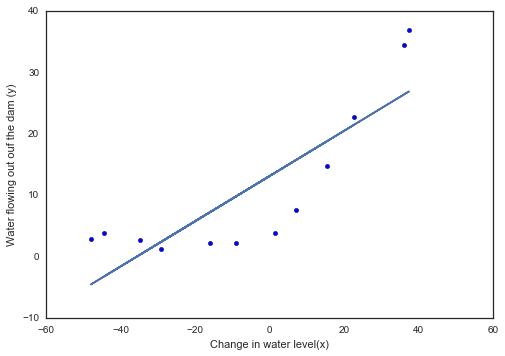

In [6]:
# plot data
plt.scatter(X,y)
plt.xlabel('Change in water level(x)')
plt.ylabel('Water flowing out ouf the dam (y)')
plt.plot(X,np.c_[np.ones((np.shape(X)[0],1)),X].dot(trained_theta))

In [7]:
# error function
def errorFunction(theta,X,y):
    m=y.size
    h=np.c_[np.ones((m,1)),X].dot(theta.reshape(-1,1))
    d=h-y
    J=np.sum(np.square(d))/(2*m)
    return(J)

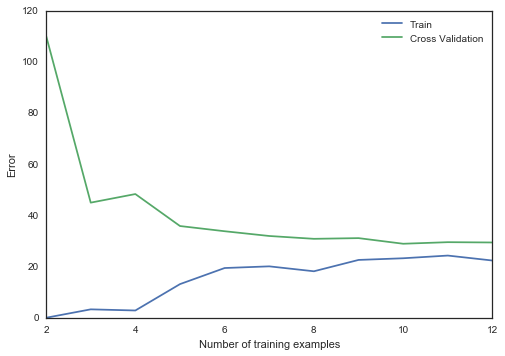

In [8]:
# learning curve
TrainError=np.zeros(y.size)
CrossError=np.zeros(y.size)
for m in range(2,y.size+1):  # m is the number of training samples
    res = sp.optimize.minimize(costFunction,initial_theta,args=(reg,X[:m],y[:m]),
                                   jac=gradFunction,method=None,options={'maxiter':50})
    TrainError[m-1]=errorFunction(res.x,X[:m],y[:m])
    CrossError[m-1]=errorFunction(res.x,Xval,yval)
plt.plot(list(range(2,y.size+1)),TrainError[1:],label='Train')
plt.plot(list(range(2,y.size+1)),CrossError[1:],label='Cross Validation')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend()

In [36]:
# polynomial regression
from sklearn.preprocessing import PolynomialFeatures
def featureExplosion(X,n_power):
    X_poly = PolynomialFeatures(n_power).fit_transform(X)
    # no need the zero term
    X_poly = X_poly[:,1:]
    return(X_poly)


In [10]:
# feature normalization
def featureNormalize(X_poly):
    X_poly_mean = np.mean(X_poly,axis=0)
    X_poly_std = np.std(X_poly,axis=0)
    X_poly_norm = (X_poly-X_poly_mean)/X_poly_std
    return((X_poly_norm,X_poly_mean,X_poly_std))


In [11]:
# predict function
def predictFunction(X,theta):
    return(np.c_[np.ones((np.shape(X)[0],1)),X].dot(theta.reshape(-1,1)))

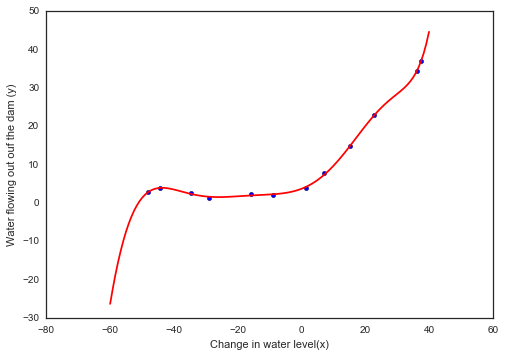

In [73]:
# optimize
reg=0
n_power=8
X_poly=featureExplosion(X,n_power)
X_poly_norm,X_poly_mean,X_poly_std=featureNormalize(X_poly)
initial_theta=np.ones(n_power+1)
res = sp.optimize.minimize(costFunction,initial_theta,args=(reg,X_poly_norm,y),
                                   jac=gradFunction,method=None,options={'maxiter':50000})
trained_theta=res.x
y_pre=predictFunction(X_poly_norm,trained_theta)
# plot data
plt.scatter(X,y)
plt.xlabel('Change in water level(x)')
plt.ylabel('Water flowing out ouf the dam (y)')
# sort and plot
X_plot=np.linspace(-60,40,121)
X_plot_poly=featureExplosion(X_plot.reshape(-1,1),n_power)
X_plot_poly_norm=(X_plot_poly-X_poly_mean)/X_poly_std
y_plot=predictFunction(X_plot_poly_norm,trained_theta)
plt.plot(X_plot,y_plot,'r')

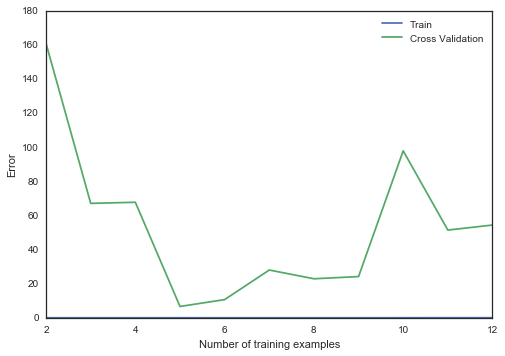

In [69]:
# learning curve
TrainError=np.zeros(y.size)
CrossError=np.zeros(y.size)
reg=0
n_power=8
X_poly=featureExplosion(X,n_power)
X_poly_norm,X_poly_mean,X_poly_std=featureNormalize(X_poly)
Xval_poly=featureExplosion(Xval,n_power)
Xval_poly_norm=(Xval_poly-X_poly_mean)/X_poly_std

initial_theta=np.zeros(n_power+1)
for m in range(2,y.size+1):  # m is the number of training samples
    res = sp.optimize.minimize(costFunction,initial_theta,args=(reg,X_poly_norm[:m],y[:m]),
                                   jac=gradFunction,method=None,options={'maxiter':5000})
    TrainError[m-1]=errorFunction(res.x,X_poly_norm[:m],y[:m])
    CrossError[m-1]=errorFunction(res.x,Xval_poly_norm,yval)
plt.plot(list(range(2,y.size+1)),TrainError[1:],label='Train')
plt.plot(list(range(2,y.size+1)),CrossError[1:],label='Cross Validation')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend()

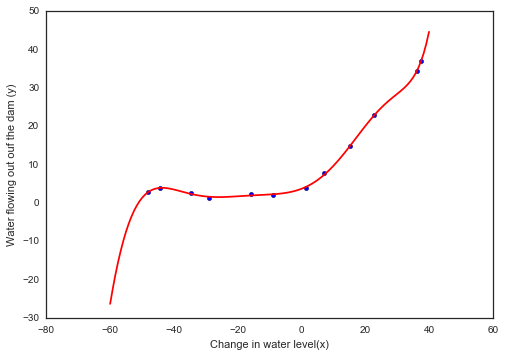

In [74]:
trained_theta=res.x
y_pre=predictFunction(X_poly_norm,trained_theta)
# plot data
plt.scatter(X,y)
plt.xlabel('Change in water level(x)')
plt.ylabel('Water flowing out ouf the dam (y)')
# sort and plot
X_plot=np.linspace(-60,40,121)
X_plot_poly=featureExplosion(X_plot.reshape(-1,1),n_power)
X_plot_poly_norm=(X_plot_poly-X_poly_mean)/X_poly_std
y_plot=predictFunction(X_plot_poly_norm,trained_theta)
plt.plot(X_plot,y_plot,'r')

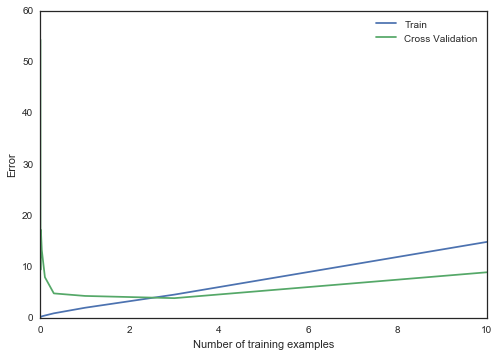

In [75]:
# choice of reg
reg_all=[0,0.001,0.003,0.01,0.03,0.1,0.3,1,3,10]
m=np.size(reg_all)
TrainError=np.zeros(m)
CrossError=np.zeros(m)
n_power=8
X_poly=featureExplosion(X,n_power)
X_poly_norm,X_poly_mean,X_poly_std=featureNormalize(X_poly)
Xval_poly=featureExplosion(Xval,n_power)
Xval_poly_norm=(Xval_poly-X_poly_mean)/X_poly_std
initial_theta=np.zeros(n_power+1)

for i,reg in enumerate(reg_all):  # m is the number of training samples
    res = sp.optimize.minimize(costFunction,initial_theta,args=(reg,X_poly_norm,y),
                                   jac=gradFunction,method=None,options={'maxiter':500})
    TrainError[i]=errorFunction(res.x,X_poly_norm,y)
    CrossError[i]=errorFunction(res.x,Xval_poly_norm,yval)

plt.plot(reg_all,TrainError,label='Train')
plt.plot(reg_all,CrossError,label='Cross Validation')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend()